# **Giới thiệu**

## **Tổng quan**


&emsp;&emsp;Trong những năm gần đây, thị trường bất động sản Bắc Kinh có những biến động lớn về giá cả, ảnh hưởng không nhỏ đến nền kinh tế xã hội. Dự án này nhằm phát triển một mô hình phân tích dự đoán giá nhà đất tại Bắc Kinh, sử dụng các thuật toán máy học để phân tích dữ liệu từ các giao dịch bất động sản và cung cấp cái nhìn sâu sắc hơn về xu hướng giá thành và hỗ trợ các nhà đầu tư, người tiêu dùng trong việc đưa ra quyết định chính xác nhất.


&emsp;&emsp;Bộ dữ liệu được sử dụng trong đồ án này bao gồm 318,851 thông tin giao dịch bất động sản tại Bắc Kinh, với 26 thuộc tính khác nhau:

*   **url** - Đường dẫn để lấy data

*   **id** - Mã giao dịch

*   **Lng** - Kinh độ theo bản đồ thế giới

*   **Lat** - Vĩ độ theo bản đồ thế giới

*   **Cid** - Mã cộng đồng

*   **tradeTime** - Ngày giao dịch

*   **DOM** - (Days on market) Thời gian trên thị trường

*   **followers** - Số người theo dõi giao dịch

*   **totalPrice** - Tổng giá thành nhà đất ($ CNY $)

*   **price** - Đơn giá nhà đất trong 1 đơn vị diện tích

*   **square** - Diện tích nhà đất (m$ ^2 $)

*   **livingRoom** - Số phòng khách

*   **drawingRoom** - Số phòng vẽ / phòng khách thứ hai

*   **kitchen** - Số phòng bếp

*   **bathRoom** - Số phòng tắm

*   **floor** - Độ cao và số tầng nhà đất

 * **未知** - Không xác định --> 1

 * **中** - Độ cao trung --> 2

 * **高** - Cao --> 3

 * **低** - Thấp --> 4

 * **顶** - Có gác mái / sân thượng --> 5

 * **底** - Có tầng hầm --> 6

*   **buildingType** - Loại hình tòa nhà

 * **1** - Tòa tháp, tòa nhà cao tầng

 * **2** - Căn nhà thấp tầng

 * **3** - Kết hợp giữa tòa tháp và tòa nhà kiểu tấm

 * **4** - Plate: Tòa nhà kiểu tấm, thiết kế phẳng

*   **constructionTime** - Thời gian xây dựng

*   **renovationCondition** - Điều kiện tu sửa

 * **1** - Các loại tu sửa khác

 * **2** - Tu sửa thô, cần được hoàn thiện đầy đủ trước khi sử dụng

 * **3** - Tu sửa đơn giản, chưa có các trang trí hay thiết bị sang trọng

 * **4** - Plate: Tu sửa cứng, sẵn sàng để sử dụng ngay

*   **buildingStructure** - Cấu trúc tòa nhà

 * **1** - Không xác định

 * **2** - Hỗn hợp

 * **3** - Gạch và gỗ

 * **4** - Gạch và bê tông

 * **5** - Thép

 * **6** - Thép và bê tông

*   **ladderRatio** - Tỷ lệ số người dân với số thang bộ / thang máy

*   **elevator** - Thang máy trong tòa nhà

 * **1** - Có

 * **0** - Không

*   **fiveYearsProperty** - Sở hữu đất trong 5 năm

 * **1** - Trên

 * **0** - Dưới

*   **subway** - Gần tàu điện ngầm

 * **1** - Có

 * **0** - Không

*   **district** - Quận / Huyện / Khu vực tại Bắc Kinh (Beijing)

 * **1** - Đông Thành - Dongcheng

 * **2** - Phong Đài - Fengtai

 * **3** - Thông Châu - Tongzhou

 * **4** - Đại Hưng - Daxing

 * **5** - Phòng Sơn - Fangshan

 * **6** - Xương Bình - Changping

 * **7** - Triều Dương - Chaoyang

 * **8** - Hải Điến - Haidian

 * **9** - Thạch Cảnh Sơn - Shijingshan

 * **10** - Tây Thành - Xicheng

 * **11** - Bình Cốc - Pinggu

 * **12** - Môn Đầu Câu - Mentougou

 * **13** - Thuận Nghĩa - Shunyi

 \* Không có thông tin từ Hoài Nhu (Huairou), Mật Vân (Miyun) và Diên Khánh (Yanqing)

*   **communityAverage** - Giá trung bình cộng đồng

&emsp;&emsp;Dữ liệu được thu thập nhằm mục đích phân tích đặc điểm và định giá bất động sản dựa trên các yếu tố này.

## **Setup**

In [ ]:
# %pip install pandas numpy matplotlib seaborn scikit-learn torch joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from joblib import load, dump

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab.drive import mount
mount('/content/drive')

file_path = lambda file_name: f'drive/MyDrive/SIC/{file_name}'

Mounted at /content/drive


## **Quan sát**

In [ ]:
# File chứa Hán tự nên sử dụng gbk để đọc
df = pd.read_csv(file_path('housepricing.csv'), encoding='gbk', low_memory=False)

display(df.head(), df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


None

# **Tiền xử lý dữ liệu**

## **Xử lý thông tin**

In [ ]:
# Lấy vị trí số cột nhất định
index = df.shape[1] // 3

# Những thông tin bị lệch sang cột khác, không phải sai thông tin
print('Tổng số thông tin lệch: ', df.isin(['#NAME?']).any(axis=1).sum())
display(df[df.isin(['#NAME?']).any(axis=1)].iloc[:, index:].head(10),
        df.iloc[:, index:].head(10))

Tổng số thông tin lệch:  32


,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
92235,198.0,15729,125.89,#NAME?,中 14,3,2006,钢混结构,0.500,1,0,0,0.0,NaN,NaN,NaN,12,39492.0
92251,136.0,14601,93.15,#NAME?,中 15,4,2003,钢混结构,0.333,1,0,0,0.0,NaN,NaN,NaN,12,37588.0
92267,127.0,14613,86.91,#NAME?,中 16,4,2006,钢混结构,0.333,1,0,0,0.0,NaN,NaN,NaN,12,38753.0
92270,115.0,14240,80.76,#NAME?,中 6,4,2003,混合结构,0.500,0,0,0,0.0,NaN,NaN,NaN,12,36923.0
92297,100.0,17242,58.00,#NAME?,高 14,3,2006,钢混结构,0.125,1,0,0,0.0,NaN,NaN,NaN,12,39492.0
92299,205.0,13021,157.44,#NAME?,顶 6,4,2006,混合结构,0.500,0,0,0,0.0,NaN,NaN,NaN,12,36923.0
92300,146.5,15985,91.65,#NAME?,中 16,4,2006,钢混结构,0.500,1,0,0,0.0,NaN,NaN,NaN,12,38753.0
92304,90.0,14288,62.99,#NAME?,中 6,4,1990,混合结构,0.333,0,0,0,0.0,NaN,NaN,NaN,12,39381.0
92340,130.0,17640,73.70,#NAME?,低 6,4,2000,混合结构,0.500,0,0,0,0.0,NaN,NaN,NaN,12,36358.0
92349,109.5,17484,62.63,#NAME?,中 14,3,2006,钢混结构,0.125,1,0,0,0.0,NaN,NaN,NaN,12,39492.0


,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,275.6,52000,53.00,1,0,1,1,中 8,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,275.0,37672,73.00,2,1,1,1,高 6,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,800.0,49521,161.55,3,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,134.0,27917,48.00,1,0,1,1,高 10,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,380.0,55883,68.00,1,0,0,0,中 23,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0


In [ ]:
rows = df.isin(['#NAME?']).any(axis=1)

df.loc[rows, ['ladderRatio', 'elevator', 'fiveYearsProperty', 'subway']] = df.loc[rows, ['buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure']].values
df.loc[rows, ['floor', 'buildingType', 'constructionTime']] = df.loc[rows, ['drawingRoom', 'kitchen', 'bathRoom']].values
df.loc[rows, ['drawingRoom', 'kitchen', 'renovationCondition', 'buildingStructure']] = np.nan

df[df.isin(['#NAME?']).any(axis=1)].iloc[:, index:].head()

<ipython-input-72-ceac20b271fa>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[rows, ['ladderRatio', 'elevator', 'fiveYearsProperty', 'subway']] = df.loc[rows, ['buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure']].values


,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
92235,198.0,15729,125.89,#NAME?,NaN,NaN,2006,中 14,3.0,2006,NaN,NaN,0.500,1,0.0,0.0,12,39492.0
92251,136.0,14601,93.15,#NAME?,NaN,NaN,2003,中 15,4.0,2003,NaN,NaN,0.333,1,0.0,0.0,12,37588.0
92267,127.0,14613,86.91,#NAME?,NaN,NaN,2006,中 16,4.0,2006,NaN,NaN,0.333,1,0.0,0.0,12,38753.0
92270,115.0,14240,80.76,#NAME?,NaN,NaN,2003,中 6,4.0,2003,NaN,NaN,0.500,0,0.0,0.0,12,36923.0
92297,100.0,17242,58.00,#NAME?,NaN,NaN,2006,高 14,3.0,2006,NaN,NaN,0.125,1,0.0,0.0,12,39492.0


In [ ]:
# Chuyển các giá trị "rỗng" thành rỗng
df = df.replace(['', '#NAME?', 'nan', ' ', '未知'], np.nan)

print('Tỷ lệ giá trị rỗng:')
print(df.isna().mean().round(5) * 100)
print('\nSố giá trị rỗng: ', df.isna().sum().sum())

Tỷ lệ giá trị rỗng:
url                     0.000
id                      0.000
Lng                     0.000
Lat                     0.000
Cid                     0.000
tradeTime               0.000
DOM                    49.546
followers               0.000
totalPrice              0.000
price                   0.000
square                  0.000
livingRoom              0.010
drawingRoom             0.010
kitchen                 0.010
bathRoom                0.001
floor                   0.000
buildingType            0.634
constructionTime        6.048
renovationCondition     0.010
buildingStructure       0.010
ladderRatio             0.000
elevator                0.000
fiveYearsProperty       0.000
subway                  0.000
district                0.000
communityAverage        0.145
dtype: float64

Số giá trị rỗng:  179908


## **Xử lý cột**

In [ ]:
# Tách các ký tự không phải số
df['floorType'] = df['floor'].str.extract(r'([^\d]+)', expand=False).str.strip()
df['floor'] = df['floor'].str.extract(r'(\d+)', expand=False).str.strip()

display(df['floorType'].value_counts(), df[['floor', 'floorType']].sample(5))

,count
floorType,
中,119846
高,70098
低,64145
顶,37408
底,26083
未知,1271


,floor,floorType
201291,18,低
259573,16,低
195557,6,高
72715,19,低
46192,34,中


In [ ]:
# Định nghĩa lại giá trị
floor_mapping = { '未知': 1, '底': 2, '低': 3, '中': 4, '高': 5, '顶': 6 }
df['floorType'] = df['floorType'].map(floor_mapping)
df['buildingStructure'] = df['buildingStructure'].replace(['混合结构', '钢混结构'], [2, 6])

df[['floor', 'floorType', 'buildingStructure']].sample(5)

,floor,floorType,buildingStructure
306431,21,5,6.0
25312,9,3,6.0
29663,28,3,6.0
231319,18,3,6.0
193142,6,3,2.0


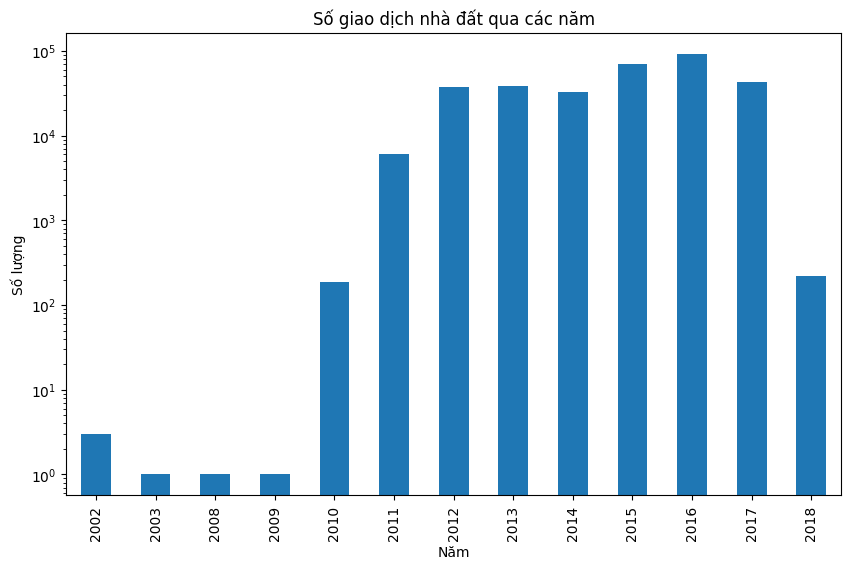

[3, 1, 1, 1, 189, 6010, 37221, 38751, 32602, 69805, 90829, 43217, 221]

In [ ]:
df[['tradeYear', 'tradeMonth', 'tradeDay']] = df['tradeTime'].str.split('-', expand=True).astype(int)
data = df['tradeYear'].value_counts().sort_index()

data.plot(kind='bar', logy=True, figsize=(10, 6))
plt.xlabel('Năm')
plt.ylabel('Số lượng')
plt.title('Số giao dịch nhà đất qua các năm')
plt.show()

data.tolist()

## **Cột DOM (the number of days on the market)**
*   Để xử lý cột này, ta xử lý các đặc trưng có liên kết cao với nó, bao gồm: "tradeYear", "district" và "followers"
*   Đánh giá các giá trị trống trong "DOM" bằng cách tính trung bình của dữ liệu có cùng giá trị với chúng trong ba tính năng "tradeYear", "district", "follow_type" tương ứng
*   Vì "followers" là một biến số, nên không tiện dụng để gộp, do đó chúng tôi chuyển nó thành một biến kiểu chuỗi - "follow_type"

In [ ]:
bins = [-1, 0, 5, 10, 20, 50, 9999]
df['follow_type'], b = pd.cut(x=df['followers'], bins=bins, right=True, retbins=True)

df['DOM'].fillna(df.groupby(['district', 'tradeYear', 'follow_type'])['DOM'].transform('mean'), inplace=True)
df['DOM'].fillna(df['DOM'].mean(), inplace=True)

df.drop('follow_type', axis=1, inplace=True)

<ipython-input-77-46aa45ed3f5f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['DOM'].fillna(df.groupby(['district', 'tradeYear', 'follow_type'])['DOM'].transform('mean'), inplace=True)


In [ ]:
for col in df.columns:
    if df[col].isna().mean() > 0:  # Nếu có giá trị null
        if df[col].dtype == 'object':
            # Thay thế bằng mode cho kiểu object, string
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
        else:
            # Thay thế bằng mean hoặc median cho kiểu int, bool, float
            mean_value = df[col].mean()
            median_value = df[col].median()

            # Quyết định thay thế bằng mean hoặc median dựa trên phân phối dữ liệu
            if skew(df[col].dropna()) < 1:  # Phân phối chuẩn hoặc gần chuẩn
                df[col].fillna(mean_value, inplace=True)
            else:  # Phân phối lệch
                df[col].fillna(median_value, inplace=True)

## **Biến đổi dữ liệu**

In [ ]:
display(df.select_dtypes(include=[object]).head(),
        df.select_dtypes(include=[float]).head())

,url,id,tradeTime,livingRoom,drawingRoom,bathRoom,floor,constructionTime,elevator
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,2016-08-09,2,1,1,26,2005,1.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,2016-07-28,2,2,2,22,2004,1.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,2016-12-11,3,2,3,4,2005,1.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,2016-09-30,3,1,1,21,2008,1.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,2016-08-28,2,1,1,6,1960,0.0


,Lng,Lat,DOM,totalPrice,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,fiveYearsProperty,subway,communityAverage
0,116.475489,40.019520,1464.0,415.0,131.00,1.0,1.0,3.0,6.0,0.217,0.0,1.0,56021.0
1,116.453917,39.881534,903.0,575.0,132.38,1.0,1.0,4.0,6.0,0.667,1.0,0.0,71539.0
2,116.561978,39.877145,1271.0,1030.0,198.00,1.0,4.0,3.0,6.0,0.500,0.0,0.0,48160.0
3,116.438010,40.076114,965.0,297.5,134.00,1.0,1.0,1.0,6.0,0.273,0.0,0.0,51238.0
4,116.428392,39.886229,927.0,392.0,81.00,1.0,4.0,2.0,2.0,0.333,1.0,1.0,62588.0


In [ ]:
cols = ['livingRoom', 'drawingRoom', 'bathRoom', 'floor', 'constructionTime', 'kitchen', 'buildingType', 'elevator', 'fiveYearsProperty', 'subway']
for col in cols:
    result = pd.to_numeric(df[col], errors='coerce')
    non_numeric_values = df[result.isna()][[col]]
    print(non_numeric_values)

Empty DataFrame
Columns: [livingRoom]
Index: []
Empty DataFrame
Columns: [drawingRoom]
Index: []
Empty DataFrame
Columns: [bathRoom]
Index: []
Empty DataFrame
Columns: [floor]
Index: []
Empty DataFrame
Columns: [constructionTime]
Index: []
Empty DataFrame
Columns: [kitchen]
Index: []
Empty DataFrame
Columns: [buildingType]
Index: []
Empty DataFrame
Columns: [elevator]
Index: []
Empty DataFrame
Columns: [fiveYearsProperty]
Index: []
Empty DataFrame
Columns: [subway]
Index: []


In [ ]:
print(df['drawingRoom'].unique(), df['subway'].unique())

df[cols] = df[cols].apply(lambda col: col.astype(int))

df['drawingRoom'].unique(), df['subway'].unique()

['1' '2' '0' '4' '3' '5'] [1. 0.]


(array([1, 2, 0, 4, 3, 5]), array([1, 0]))

In [ ]:
# Dữ liệu đã xử lý
df.to_csv('drive/MyDrive/SIC/processed.csv', index=False)

# **Phân tích dữ liệu**

In [ ]:
df = pd.read_csv(file_path('processed.csv'), low_memory=False)
df.sample(5)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorType,tradeYear,tradeMonth,tradeDay
103103,https://bj.lianjia.com/chengjiao/BJCP87155820....,BJCP87155820,116.337461,40.086345,1111027381983,2014-03-24,1.023474,1,315.0,21702,...,0.500,0,1,0,6,40612.0,5,2014,3,24
83083,https://bj.lianjia.com/chengjiao/101101929547....,101101929547,116.342241,40.038962,1111027380722,2017-08-11,2.000000,0,900.0,90000,...,0.500,1,0,0,8,87365.0,4,2017,8,11
172363,https://bj.lianjia.com/chengjiao/BJCY89775887....,BJCY89775887,116.440728,39.963453,1111027375051,2015-08-28,2.080414,0,500.0,47788,...,0.375,1,1,1,7,69767.0,5,2015,8,28
12768,https://bj.lianjia.com/chengjiao/101100185161....,101100185161,116.389264,39.886874,1111027376481,2016-06-25,11.000000,5,545.0,82514,...,0.059,1,1,1,10,91507.0,3,2016,6,25
103542,https://bj.lianjia.com/chengjiao/BJCP87472872....,BJCP87472872,116.332045,40.081334,1111027377891,2014-09-14,1.020000,10,150.0,25611,...,0.500,0,0,0,6,48852.0,6,2014,9,14


## **Thống kê cơ bản**

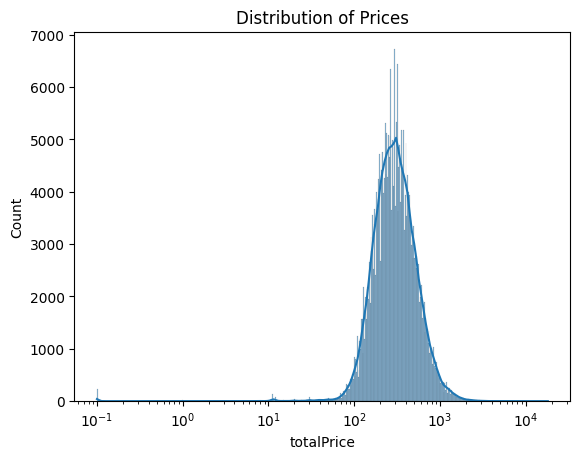

In [ ]:
sns.histplot(df['totalPrice'], kde=True, log_scale=True)
plt.title('Distribution of Prices')
plt.show()

Biểu đồ cho thấy dữ liệu có hình dạng chuẩn mà không đều, với đỉnh nằm ở khoảng giữa, có vẻ như phân bố lệch trái. Điều này cho thấy đa số bất động sản có giá thấp đến trung bình, với ít bất động sản có giá cao.

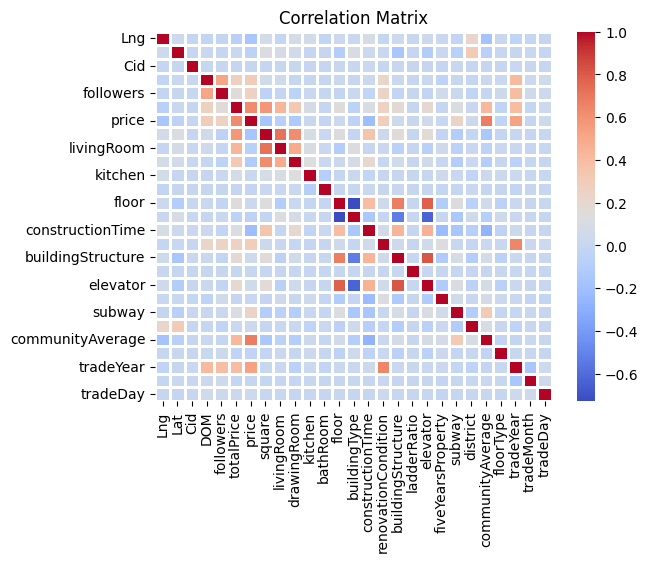

In [ ]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=False, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

Biểu đồ cho thấy một mối quan hệ tăng dần, nhưng không hoàn toàn tuyến tính. Khi diện tích tăng, giá cũng tăng theo nhưng với tốc độ không đồng đều.

Dữ liệu phân tán rộng, cho thấy có sự đa dạng trong các loại bất động sản với các mức giá khác nhau.

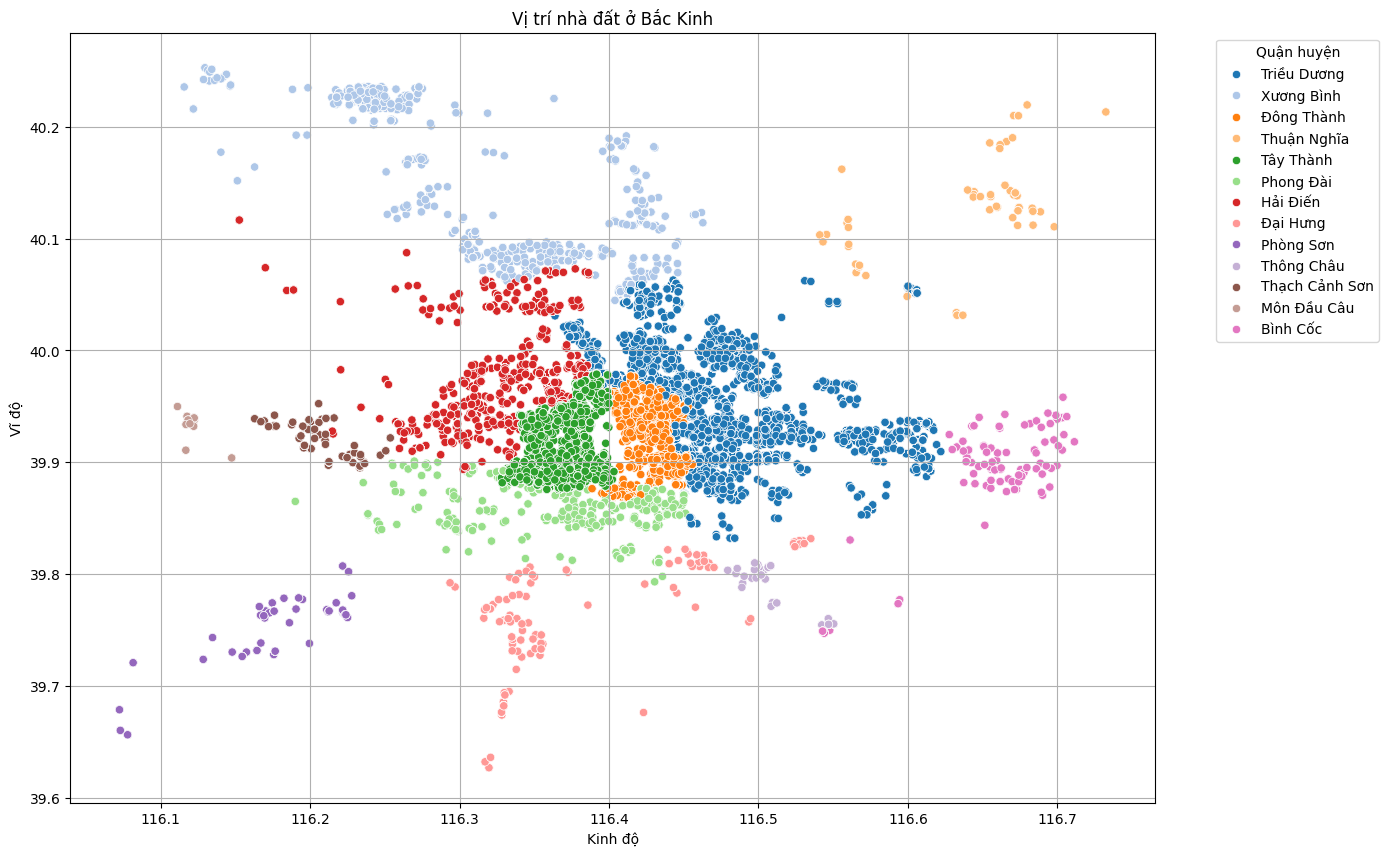

In [ ]:
district_mapping = {
    1: 'Đông Thành', 2: 'Phong Đài', 3: 'Thông Châu', 4: 'Đại Hưng', 5: 'Phòng Sơn', 6: 'Xương Bình ', 7: 'Triều Dương',
    8: 'Hải Điến', 9: 'Thạch Cảnh Sơn', 10: 'Tây Thành', 11: 'Bình Cốc', 12: 'Môn Đầu Câu', 13: 'Thuận Nghĩa'
}
df['district_name'] = df['district'].map(district_mapping)

plt.figure(figsize=(14, 10))
sns.scatterplot(x=df['Lng'], y=df['Lat'], hue=df['district_name'], palette='tab20', legend='full')
plt.title('Vị trí nhà đất ở Bắc Kinh')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.legend(title='Quận huyện', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

![Bắc Kinh](https://drive.google.com/uc?export=view&id=1cCq07UAMx1iAL3z2XU0l1ynkc89Ln3Fq)

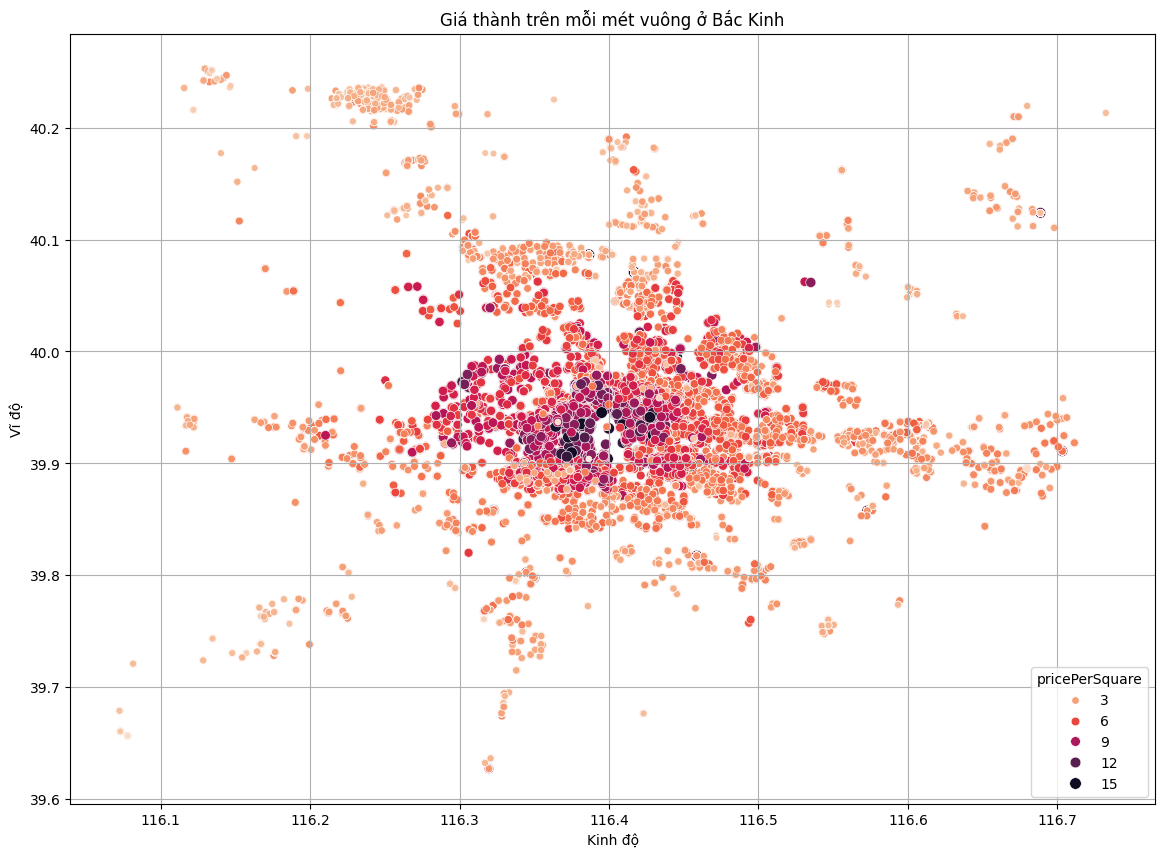

In [ ]:
df['pricePerSquare'] = df['totalPrice'] / df['square']

plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(x='Lng', y='Lat', size='pricePerSquare',
                          hue='pricePerSquare', palette='rocket_r', data=df)

plt.title('Giá thành trên mỗi mét vuông ở Bắc Kinh')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.grid(True)

plt.show()

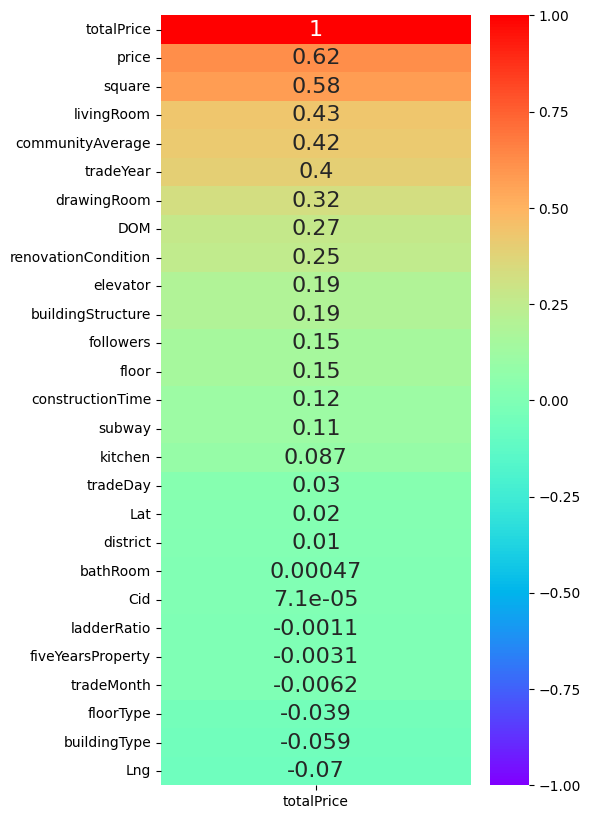

In [ ]:
df = df.drop(['district_name', 'pricePerSquare'], axis=1, errors='ignore')
features = df.select_dtypes(exclude=['object']).corr()[['totalPrice']].sort_values(by=['totalPrice'], ascending=False)

plt.figure(figsize=(5, 10))
sns.heatmap(features, cmap='rainbow', annot=True, annot_kws={'size': 16}, vmin=-1)
plt.show()

 - **price** và **square** đều có tương quan cao với totalPrice, điều này là dễ hiểu vì tổng giá cả thường tăng lên theo giá mỗi đơn vị và diện tích của bất động sản.

 - **livingRoom**, **drawingRoom** và **communityAverage** cũng cho thấy mối tương quan mạnh, cho thấy rằng những bất động sản có nhiều phòng khách hoặc nằm trong cộng đồng có giá trị trung bình cao thường có giá bán tổng thể cao.

 - **TradeYear** và **DOM**

<ipython-input-89-07202c501428>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt, x='tradeTime', y='totalPrice', saturation=0.7, ax=ax, palette=palette)
<ipython-input-89-07202c501428>:12: UserWarning: 
The palette list has fewer values (9) than needed (97) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dt, x='tradeTime', y='totalPrice', saturation=0.7, ax=ax, palette=palette)


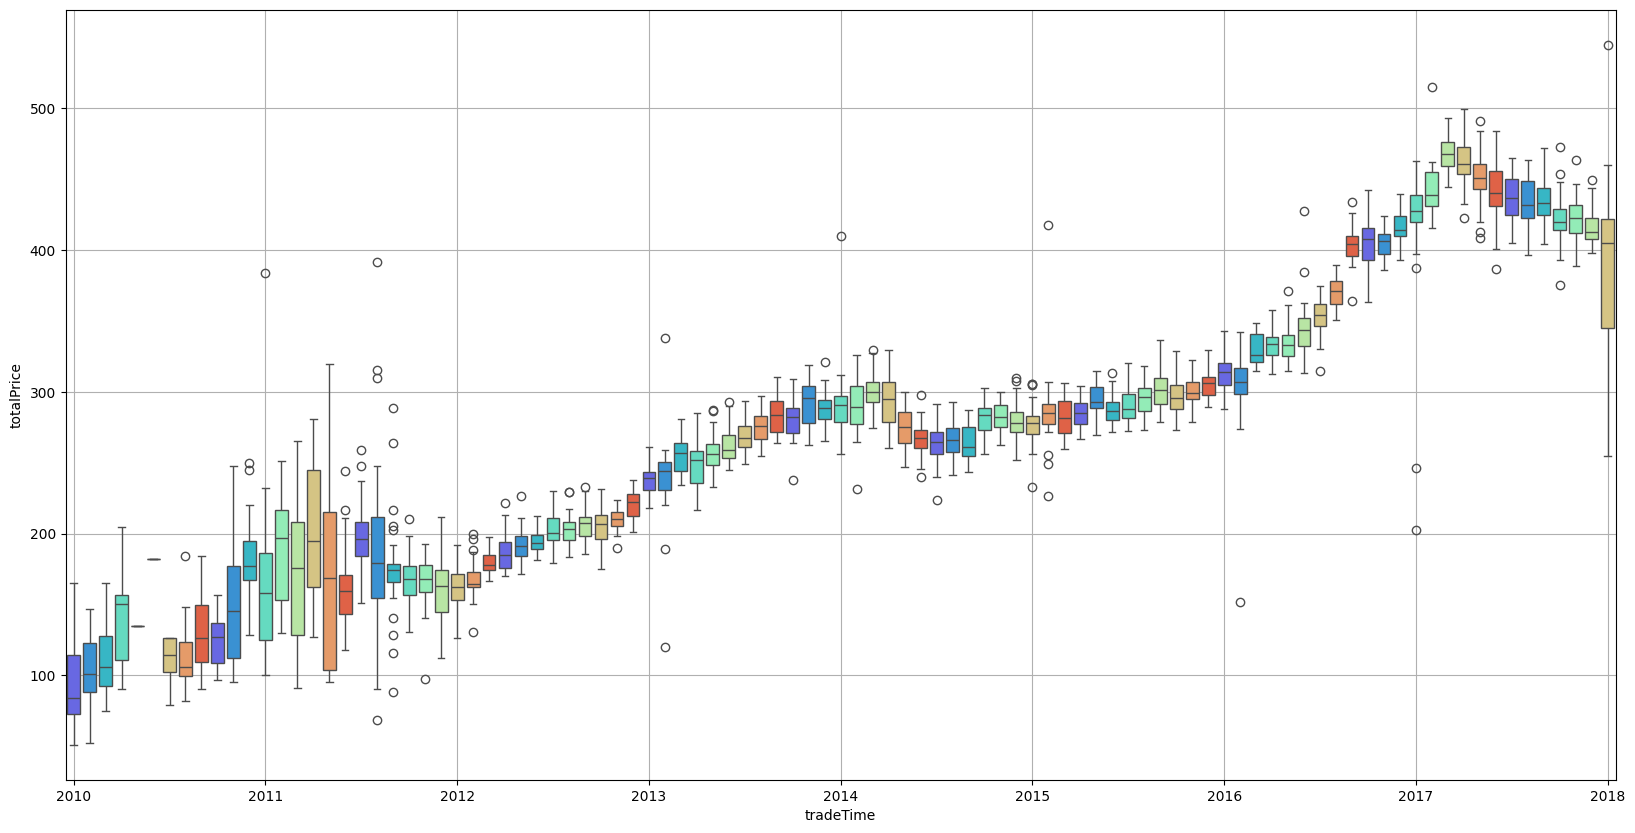

In [ ]:
dt = df.groupby(['tradeYear', 'tradeMonth', 'tradeDay'])['totalPrice'].mean().reset_index()
dt = dt[dt['tradeYear'] >= 2010]
date_df = pd.DataFrame({
    'year': dt['tradeYear'],
    'month': dt['tradeMonth'],
    'day': 1
})
dt['tradeTime'] = pd.to_datetime(date_df)

fig, ax = plt.subplots(figsize=(20, 10))
palette = sns.color_palette('rainbow', n_colors=dt['tradeYear'].nunique())
sns.boxplot(data=dt, x='tradeTime', y='totalPrice', saturation=0.7, ax=ax, palette=palette)

plt.xticks(np.arange(0, len(dt['tradeTime'].unique()), 12), labels=range(2010, 2018+1))
ax.grid(True)
plt.show()

**Xu hướng giá tăng dần**: giá nhà đất đã tăng qua các năm từ 2010 đến 2018

**Biến dộng giá chênh lệch**: Các điểm dữ liệu nằm ngoài các "whiskers" của boxplot (các outliers) cho thấy có một số giao dịch với giá bất động sản cao bất thường so với mức trung bình của tháng đó, điều này có thể do các giao dịch bất động sản cao cấp hoặc các yếu tố khác ảnh hưởng.

## **Khai phá**

In [ ]:
# Xử lý giá trị ngoại lệ bằng Interquartile Range
Q1 = df[['totalPrice', 'square']].quantile(0.25)
Q3 = df[['totalPrice', 'square']].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị outliers
outliers = ((df[['totalPrice', 'square']] < (Q1 - 1.5 * IQR)) | (df[['totalPrice', 'square']] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outliers]

print(df.shape)

(296375, 30)


In [ ]:
X = df.drop(['id', 'url', 'Cid', 'tradeTime', 'tradeDay', 'tradeMonth', 'tradeYear', 'totalPrice', 'price'], axis=1, errors='ignore')
y = df['totalPrice'].values.reshape(-1, 1)

In [ ]:
# Chuẩn hóa dữ liệu
scaler_feature = MinMaxScaler()
scaler_target = MinMaxScaler()

X_scaled = scaler_feature.fit_transform(X)
y_scaled = scaler_target.fit_transform(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

### **Mô hình Mạng Neuron**

In [ ]:
# Khởi tạo mô hình
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(64)

        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.bn1(x)

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.bn2(x)

        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout(x)

        x = self.fc4(x)
        return x

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [ ]:
# Khai báo GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Chuyển đổi dữ liệu sang tensor và đưa vào GPU
x_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
x_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

nn_model = SimpleNN().to(device)

In [ ]:
# Cài đặt huấn luyện
loss_function = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.002)

# Huấn luyện mô hình
epochs = 100
for epoch in range(epochs):
    nn_model.train()
    optimizer.zero_grad() # Xóa bộ nhớ cũ
    outputs = nn_model(x_train_tensor)
    loss = loss_function(outputs, y_train_tensor)
    loss.backward() # Áp dụng Gradient Descent để cập nhật lại trọng số
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0686
Epoch [20/100], Loss: 0.0467
Epoch [30/100], Loss: 0.0379
Epoch [40/100], Loss: 0.0327
Epoch [50/100], Loss: 0.0293
Epoch [60/100], Loss: 0.0271
Epoch [70/100], Loss: 0.0255
Epoch [80/100], Loss: 0.0242
Epoch [90/100], Loss: 0.0234
Epoch [100/100], Loss: 0.0226


In [ ]:
nn_model.eval()
with torch.no_grad():
    train_pred = nn_model(x_train_tensor).cpu().numpy()
    test_pred = nn_model(x_test_tensor).cpu().numpy()

X_train = np.hstack((X_train, train_pred))
X_test = np.hstack((X_test, test_pred))

In [ ]:
pd.DataFrame(X_train).to_csv(file_path('Results/X_train.csv'), index=False)
pd.DataFrame(X_test).to_csv(file_path('Results/X_test.csv'), index=False)
pd.DataFrame(y_train).to_csv(file_path('Results/y_train.csv'), index=False)
pd.DataFrame(y_test).to_csv(file_path('Results/y_test.csv'), index=False)

### **Mô hình kết hợp**

In [ ]:
# X_train = pd.DataFrame(file_path('Results/X_train.csv'))
# X_test = pd.DataFrame(file_path('Results/X_test.csv'))
# y_train = pd.DataFrame(file_path('Results/y_train.csv'))
# y_test = pd.DataFrame(file_path('Results/y_test.csv'))

In [ ]:
# Linear Regression
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
ln_pred = ln_model.predict(X_test)

ln_res = evaluate_model(y_test, ln_pred)

Mean Absolute Error (MAE): 0.0848
Mean Squared Error (MSE): 0.0128
Root Mean Squared Error (RMSE): 0.1133
R-squared (R2): 0.6505


In [ ]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=20, max_features='sqrt', min_samples_leaf=4, min_samples_split=2)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_res = evaluate_model(y_test, dt_pred)

Mean Absolute Error (MAE): 0.0664
Mean Squared Error (MSE): 0.0089
Root Mean Squared Error (RMSE): 0.0943
R-squared (R2): 0.7580


In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=20)
rf_model.fit(X_train, y_train.ravel())
rf_pred = rf_model.predict(X_test)

rf_res = evaluate_model(y_test, rf_pred)

Mean Absolute Error (MAE): 0.0511
Mean Squared Error (MSE): 0.0053
Root Mean Squared Error (RMSE): 0.0730
R-squared (R2): 0.8551


In [ ]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=20, random_state=42)
gb_model.fit(X_train, y_train.ravel())
gb_pred = gb_model.predict(X_test)

gb_res = evaluate_model(y_test, gb_pred)

Mean Absolute Error (MAE): 0.0533
Mean Squared Error (MSE): 0.0060
Root Mean Squared Error (RMSE): 0.0774
R-squared (R2): 0.8369


In [ ]:
# Đa lớp Perceptron
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train.ravel())
mlp_pred = mlp_model.predict(X_test)

mlp_res = evaluate_model(y_test, mlp_pred)

Mean Absolute Error (MAE): 0.0622
Mean Squared Error (MSE): 0.0072
Root Mean Squared Error (RMSE): 0.0846
R-squared (R2): 0.8051


# **Báo cáo**

## **Đánh giá mô hình**

In [ ]:
results = {
    'LN': ln_res,
    'DT': dt_res,
    'GB': gb_res,
    'RF': rf_res,
    'MLP': mlp_res
}

metrics = ['MAE', 'MSE', 'RMSE', 'R2']
df_result = pd.DataFrame(results, index=metrics)

In [ ]:
predictions = {
    'LN': ln_pred.ravel(),
    'DT': dt_pred.ravel(),
    'GB': gb_pred.ravel(),
    'RF': rf_pred.ravel(),
    'MLP': mlp_pred.ravel()
}

models = {
    'LN': ln_model,
    'DT': dt_model,
    'GB': gb_model,
    'RF': rf_model,
    'MLP': mlp_model
}

y_test_array = np.ravel(y_test.squeeze())

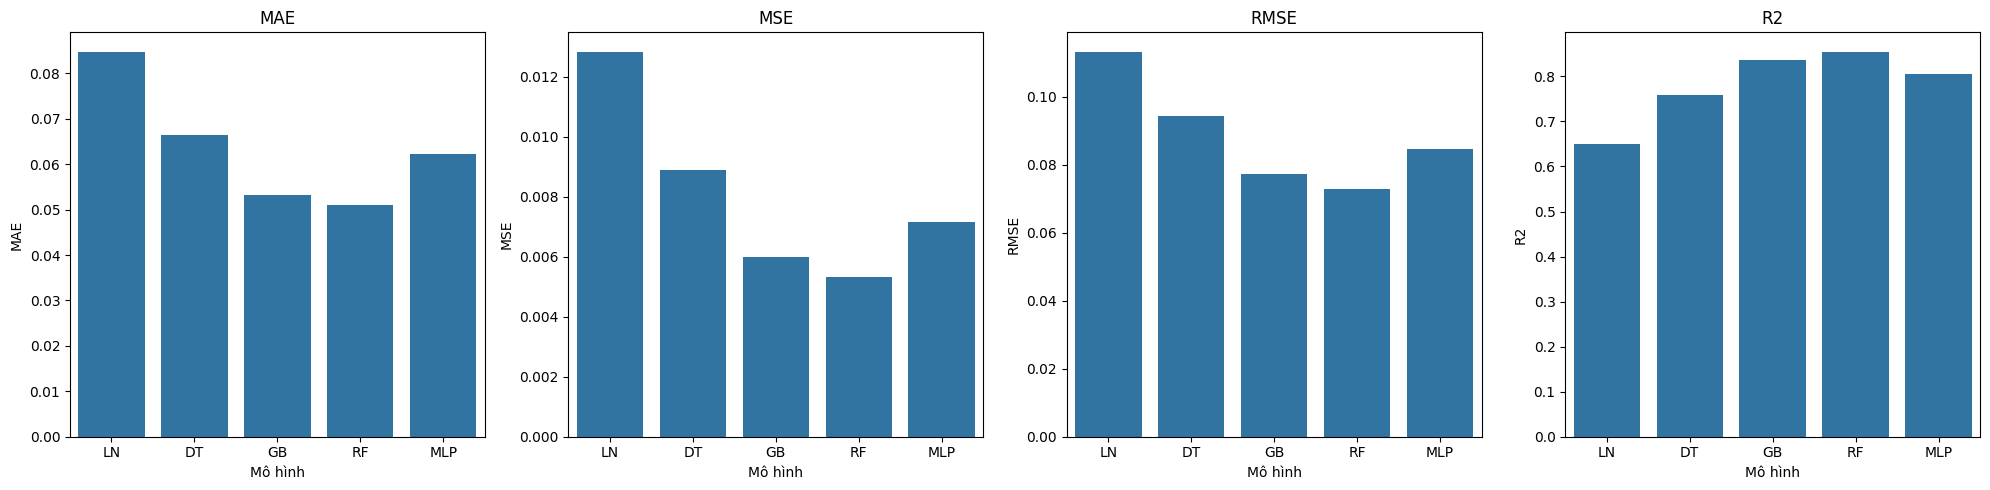

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, metric in enumerate(metrics):
    sns.barplot(ax=axes[i], data=df_result.T, x=df_result.T.index, y=metric)
    axes[i].set_title(f'{metric}')
    axes[i].set_xlabel('Mô hình')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

Random Forest là mô hình tốt nhất trong tất cả mô hình với kết quả $ MAE, MSE $ thấp nhất và $ R^2 $ cao nhất.

MLP, Decision Tree và Gradient Boosting có kết quả tương đối ổn định với hiệu suất tốt về mặt sai số thấp.

Linear Regression là mô hình cho thấy tỷ lệ lỗi cao nhất và hiệu suất thấp nhất.

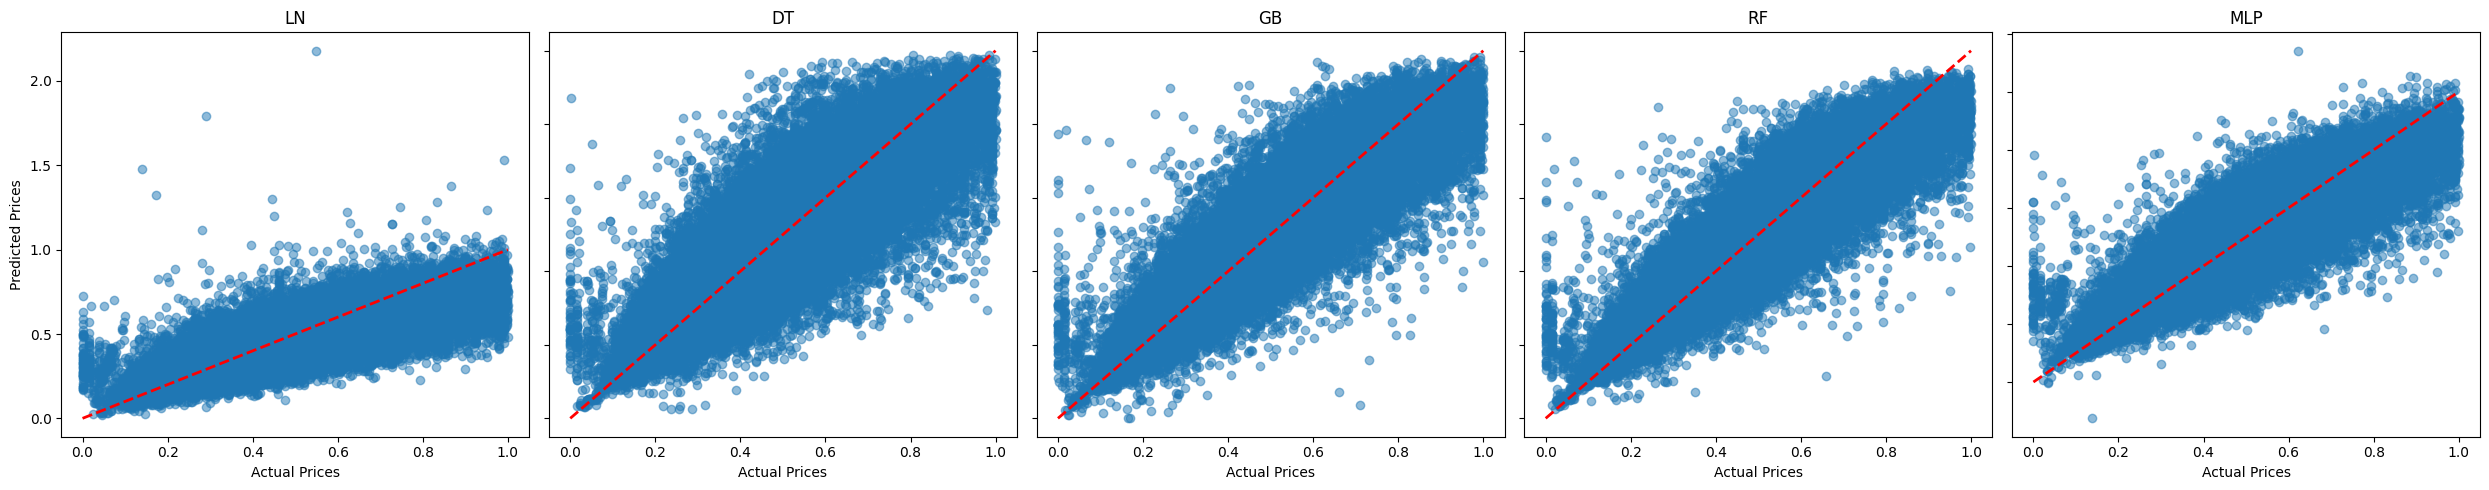

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
for ax, model in zip(axes, predictions.keys()):
    ax.scatter(y_test, predictions[model], alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_title(f'{model}')
    ax.set_xlabel('Actual Prices')
    ax.set_ylabel('Predicted Prices')
    ax.label_outer()  # Dọn dẹp các nhãn cho gọn gàng

plt.tight_layout()
plt.show()

Linear Regression có sự khác biệt đáng kể so với đường 𝑦 = 𝑥, cho thấy dấu hiệu của sự thiếu khớp và hiệu suất dự đoán kém.

Decision Tree và Gradient Boosting gần hơn với đường thẳng nhưng vẫn thể hiện sự phân tán, cho thấy mức độ khớp vừa phải, xử lý ảnh hưởng của đặc trưng tốt hơn.

Random Forest và MLP thể hiện sự khớp tốt nhất với đường 𝑦 = 𝑥, cho thấy dự đoán xuất sắc trong phạm vi.

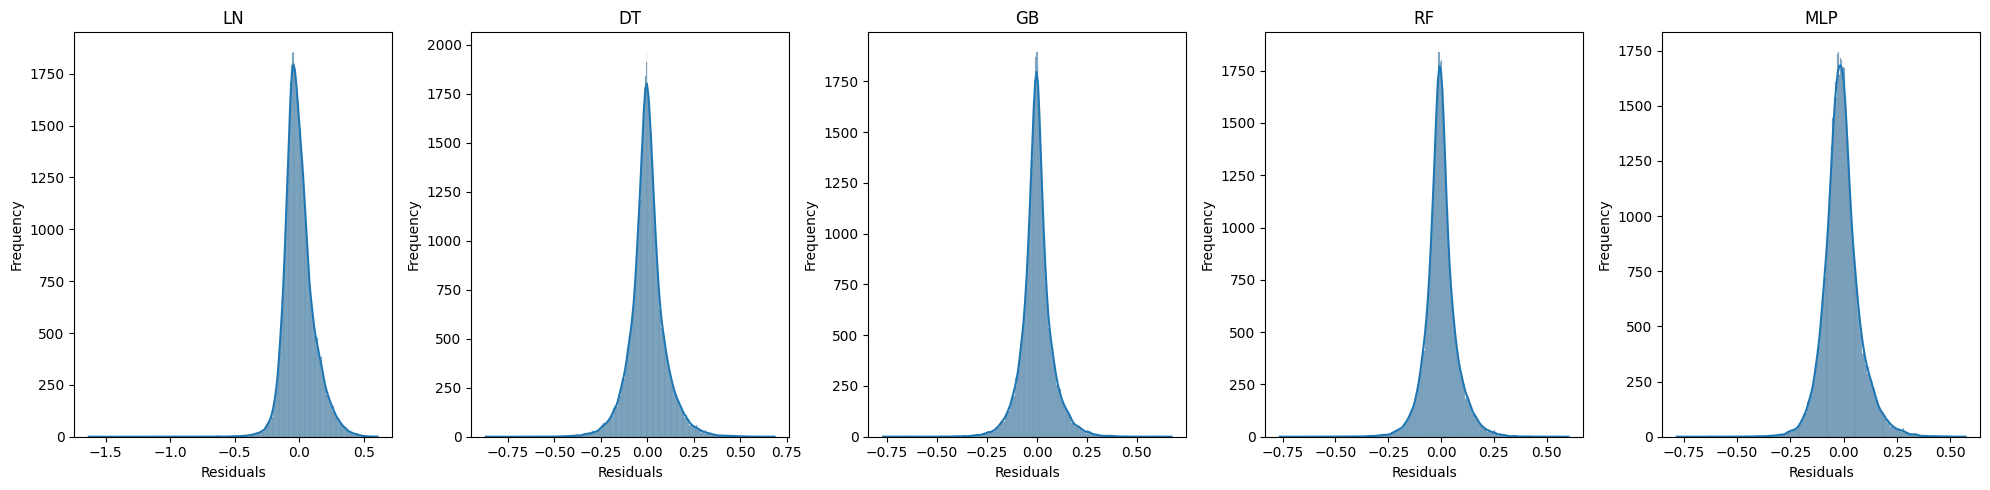

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
for ax, (model, pred) in zip(axes, predictions.items()):
    residuals = y_test_array - pred
    sns.histplot(ax=ax, data=residuals, kde=True)
    ax.set_title(f'{model}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Tất cả biểu đồ càng hẹp và tập trung xung quanh số 0 càng tốt, vì điều này cho thấy sai số nhỏ và không thiên vị.

LN, GB và DT: Hiển thị phân bố rộng và ít tập trung, cho thấy sự phân tán trong lỗi và thiên vị tiềm ẩn.

RF và MLP: Thể hiện phân bố đỉnh cao chính xác xung quanh số không, cho thấy độ chính xác và nhất quán tốt của mô hình.

In [ ]:
df_result.to_csv(file_path('Results/results.csv'))
df_result

,LN,DT,GB,RF,MLP
MAE,0.084804,0.066408,0.053259,0.051051,0.062219
MSE,0.012845,0.008894,0.005994,0.005327,0.007164
RMSE,0.113336,0.094309,0.077420,0.072984,0.084642
R2,0.650545,0.758031,0.836937,0.855086,0.805093


## **Xuất mô hình**

In [ ]:
for name, model in models.items():
    dump(model, file_path(f'Models/{name}.joblib'))

dump(nn_model, file_path('Models/NN.joblib'))
dump(scaler_feature, file_path('Scalers/scaler_feature.joblib'))
dump(scaler_target, file_path('Scalers/scaler_target.joblib'))

['drive/MyDrive/SIC/Scalers/scaler_target.joblib']

In [ ]:
# models = {name: load(file_path(f'{name}.joblib')) for name in models.keys() if name != 'NN'}

# nn_model = load(file_path('NN.joblib'))
# scaler_feature = load(file_path('scaler_feature.joblib'))
# scaler_target = load(file_path('scaler_target.joblib'))

In [ ]:
test_data = df.sample(5)
input_data = test_data.drop(['id', 'url', 'Cid', 'tradeTime', 'tradeDay', 'tradeMonth', 'tradeYear', 'totalPrice', 'price'], axis=1, errors='ignore')
actual_data = test_data['totalPrice']

In [ ]:
input_scaled = scaler_feature.fit_transform(input_data)
actual_scaled = scaler_target.fit(actual_data.values.reshape(-1, 1))

input_tensor = torch.tensor(input_scaled, dtype=torch.float32).to(device)
with torch.no_grad():
    nn_pred = nn_model(input_tensor).cpu().numpy()

input_nn = np.hstack((input_scaled, scaler_target.inverse_transform(nn_pred.reshape(-1, 1))))

In [ ]:
preds = {}
for name, model in models.items():
    pred = model.predict(input_nn).reshape(-1, 1)
    preds[name] = scaler_target.inverse_transform(pred).ravel()

res = pd.DataFrame({
    'Input Data': input_data.apply(lambda x: x.tolist(), axis=1),
    **preds,
    'Actual Price': actual_data.values
})

res.to_csv(file_path('Results/predict.csv'), index=False)
res

,Input Data,LN,DT,GB,RF,MLP,Actual Price
97237,"[116.412985, 40.062212, 1.2014742014742017, 0....",153128.647052,516.921550,552.991742,557.653274,-51054.775976,320.0
309946,"[116.348282, 39.892777, 1.0124804992199687, 7....",209624.926754,598.603254,645.486476,590.509879,-69630.712140,605.0
53332,"[116.456759, 39.968701, 4.0, 0.0, 64.0, 1.0, 1...",110376.190411,305.392248,565.769639,562.412742,-36457.034164,450.0
300438,"[116.383392, 39.890378, 1.0, 0.0, 96.26, 2.0, ...",207913.800844,519.014420,499.191011,550.735444,-69533.708902,670.0
192098,"[116.463777, 39.959726, 79.73501577287067, 53....",204424.562232,361.152269,379.574711,416.605834,-59171.549961,218.0
